Load Data Check Data whether is null or not

In [2]:
!pip install cybotrade_datasource
!pip install python-dotenv

import pandas as pd
import numpy as np
import asyncio
import cybotrade_datasource
from datetime import datetime, timezone
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


import warnings as wr
wr.filterwarnings('ignore')

print(dir(cybotrade_datasource))

load_dotenv()

API_KEY = os.getenv('CYBOTRADE_API_KEY')

'''
async def main():
    data = await cybotrade_datasource.query_paginated(
        api_key=API_KEY, 
        topic='cryptoquant|btc/inter-entity-flows/miner-to-miner?from_miner=f2pool&to_miner=all_miner&window=hour', 
        start_time=datetime(year=2024, month=1, day=1, tzinfo=timezone.utc),
        end_time=datetime(year=2025, month=1, day=1, tzinfo=timezone.utc)
    )
    df = pd.DataFrame(data)
    print(df)
    

await main()
'''

'''
async def main():
    stream = await cybotrade_datasource.stream(
        api_key=API_KEY,
        topics=[
            'cryptoquant|btc/inter-entity-flows/miner-to-miner?from_miner=f2pool&to_miner=all_miner&window=hour',
            'cryptoquant|btc/market-data/liquidations?exchange=deribit&window=min',
        ],
    )
    async for msg in stream:
        print(msg)
    

await main()
'''

global_df = None 

async def get_data(topic):
    data = await cybotrade_datasource.query_paginated(
        api_key=API_KEY, 
        topic=topic, 
        limit=10000
    )
    return pd.DataFrame(data)


async def main():
    global global_df

    topics = [
        "bybit-linear|candle?symbol=BTCUSDT&interval=1m",
    ]

#topic
#"cryptoquant|btc/market-data/open-interest?exchange=bybit&window=min",
#bybit-linear|candle?interval=1m&symbol=BTCUSDT
#"cryptoquant|btc/market-data/coinbase-premium-index?window=hour",
#"cryptoquant|btc/exchange-flows/outflow?exchange=coinbase_advanced&window=hour",
#"glassnode|market/deltacap_usd?a=BTC&i=10m",

    tasks = [get_data(topic) for topic in topics]
    dataframes = await asyncio.gather(*tasks)

    for i, df in enumerate(dataframes):
        print(f"DataFrame {i+1} ({topics[i]})")
        print(df.head)
        print(df.isnull().sum())
        global_df = df

await main()


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cybotrade_datasource', 'query', 'query_paginated', 'stream']
DataFrame 1 (bybit-linear|candle?symbol=BTCUSDT&interval=1m)
<bound method NDFrame.head of          start_time    close     high      low     open   volume
0     1743676620000  83338.9  83347.5  83263.5  83280.3   25.920
1     1743676680000  83247.7  83343.4  83247.6  83338.9   22.916
2     1743676740000  83241.8  83269.1  83232.1  83247.7   37.500
3     1743676800000  83161.9  83259.1  83128.7  83241.8  122.577
4     1743676860000  83140.0  83219.4  83128.1  83161.9   83.796
...             ...      ...      ...      ...      ...      ...
9995  1744276320000  81397.1  81404.5  81347.7  81347.8   40.110
9996  1744276380000  81448.0  81449.9  81397.0  81397.1   59.519
9997  1744276440000  81458.0  81458.0  81430.0  81448.0   53.089
9998  1744276500000  81484.7  81503.4  81457.9  81458.0   38.530
9999  1744276

Display first five column of the dataframe

In [3]:
print(global_df)

         start_time    close     high      low     open   volume
0     1743676620000  83338.9  83347.5  83263.5  83280.3   25.920
1     1743676680000  83247.7  83343.4  83247.6  83338.9   22.916
2     1743676740000  83241.8  83269.1  83232.1  83247.7   37.500
3     1743676800000  83161.9  83259.1  83128.7  83241.8  122.577
4     1743676860000  83140.0  83219.4  83128.1  83161.9   83.796
...             ...      ...      ...      ...      ...      ...
9995  1744276320000  81397.1  81404.5  81347.7  81347.8   40.110
9996  1744276380000  81448.0  81449.9  81397.0  81397.1   59.519
9997  1744276440000  81458.0  81458.0  81430.0  81448.0   53.089
9998  1744276500000  81484.7  81503.4  81457.9  81458.0   38.530
9999  1744276560000  81550.4  81550.5  81483.2  81484.7   42.394

[10000 rows x 6 columns]


Analyze Data (first five and last five)

In [4]:
global_df.head()

,start_time,close,high,low,open,volume
0,1743676620000,83338.9,83347.5,83263.5,83280.3,25.920
1,1743676680000,83247.7,83343.4,83247.6,83338.9,22.916
2,1743676740000,83241.8,83269.1,83232.1,83247.7,37.500
3,1743676800000,83161.9,83259.1,83128.7,83241.8,122.577
4,1743676860000,83140.0,83219.4,83128.1,83161.9,83.796


In [5]:
global_df.tail()

,start_time,close,high,low,open,volume
9995,1744276320000,81397.1,81404.5,81347.7,81347.8,40.110
9996,1744276380000,81448.0,81449.9,81397.0,81397.1,59.519
9997,1744276440000,81458.0,81458.0,81430.0,81448.0,53.089
9998,1744276500000,81484.7,81503.4,81457.9,81458.0,38.530
9999,1744276560000,81550.4,81550.5,81483.2,81484.7,42.394


In [6]:
global_df.shape

(10000, 6)

In [7]:
num_rows = len(global_df)
print(num_rows)

10000


We had 10000 rows in this dataset (latest)

In [8]:
cat_cols = global_df.select_dtypes(include=['object']).columns
num_cols = global_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['start_time', 'close', 'high', 'low', 'open', 'volume']


In [9]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  10000 non-null  int64  
 1   close       10000 non-null  float64
 2   high        10000 non-null  float64
 3   low         10000 non-null  float64
 4   open        10000 non-null  float64
 5   volume      10000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


Obtain a statistical summary of the dataframe using describe

In [10]:
global_df.describe()

,start_time,close,high,low,open,volume
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.743977e+12,80786.265890,80835.023880,80739.047520,80786.43888,117.276068
std,1.732137e+08,2677.674041,2660.416004,2694.732636,2677.77929,205.675561
min,1.743677e+12,74584.200000,74702.500000,74456.200000,74584.20000,0.946000
25%,1.743827e+12,78393.050000,78466.475000,78304.550000,78393.05000,25.766500
50%,1.743977e+12,82001.750000,82051.300000,81960.850000,82002.50000,58.975000
75%,1.744127e+12,83037.500000,83065.750000,83012.000000,83037.82500,130.544500
max,1.744277e+12,84670.200000,84736.000000,84656.100000,84670.20000,4595.508000


In [11]:
global_df.describe(include='all')

,start_time,close,high,low,open,volume
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.743977e+12,80786.265890,80835.023880,80739.047520,80786.43888,117.276068
std,1.732137e+08,2677.674041,2660.416004,2694.732636,2677.77929,205.675561
min,1.743677e+12,74584.200000,74702.500000,74456.200000,74584.20000,0.946000
25%,1.743827e+12,78393.050000,78466.475000,78304.550000,78393.05000,25.766500
50%,1.743977e+12,82001.750000,82051.300000,81960.850000,82002.50000,58.975000
75%,1.744127e+12,83037.500000,83065.750000,83012.000000,83037.82500,130.544500
max,1.744277e+12,84670.200000,84736.000000,84656.100000,84670.20000,4595.508000


In [12]:
num_rows = global_df.shape[0]
num_cols = global_df.shape[1]
print("Rows: ", num_rows, "Columns: ", num_cols)


Rows:  10000 Columns:  6


Show columns's data types using the property df.dtypes

In [13]:
global_df.dtypes

start_time      int64
close         float64
high          float64
low           float64
open          float64
volume        float64
dtype: object

In [14]:
summary_stats = global_df.describe()
print(summary_stats)

         start_time         close          high           low         open  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.00000   
mean   1.743977e+12  80786.265890  80835.023880  80739.047520  80786.43888   
std    1.732137e+08   2677.674041   2660.416004   2694.732636   2677.77929   
min    1.743677e+12  74584.200000  74702.500000  74456.200000  74584.20000   
25%    1.743827e+12  78393.050000  78466.475000  78304.550000  78393.05000   
50%    1.743977e+12  82001.750000  82051.300000  81960.850000  82002.50000   
75%    1.744127e+12  83037.500000  83065.750000  83012.000000  83037.82500   
max    1.744277e+12  84670.200000  84736.000000  84656.100000  84670.20000   

             volume  
count  10000.000000  
mean     117.276068  
std      205.675561  
min        0.946000  
25%       25.766500  
50%       58.975000  
75%      130.544500  
max     4595.508000  


Data Cleaning

In [15]:
global_df['start_time'] = pd.to_datetime(global_df['start_time'], unit='ms')


print(global_df[['start_time']])

              start_time
0    2025-04-03 10:37:00
1    2025-04-03 10:38:00
2    2025-04-03 10:39:00
3    2025-04-03 10:40:00
4    2025-04-03 10:41:00
...                  ...
9995 2025-04-10 09:12:00
9996 2025-04-10 09:13:00
9997 2025-04-10 09:14:00
9998 2025-04-10 09:15:00
9999 2025-04-10 09:16:00

[10000 rows x 1 columns]


In [16]:
global_df.head()

,start_time,close,high,low,open,volume
0,2025-04-03 10:37:00,83338.9,83347.5,83263.5,83280.3,25.920
1,2025-04-03 10:38:00,83247.7,83343.4,83247.6,83338.9,22.916
2,2025-04-03 10:39:00,83241.8,83269.1,83232.1,83247.7,37.500
3,2025-04-03 10:40:00,83161.9,83259.1,83128.7,83241.8,122.577
4,2025-04-03 10:41:00,83140.0,83219.4,83128.1,83161.9,83.796


In [17]:
global_df.tail()

,start_time,close,high,low,open,volume
9995,2025-04-10 09:12:00,81397.1,81404.5,81347.7,81347.8,40.110
9996,2025-04-10 09:13:00,81448.0,81449.9,81397.0,81397.1,59.519
9997,2025-04-10 09:14:00,81458.0,81458.0,81430.0,81448.0,53.089
9998,2025-04-10 09:15:00,81484.7,81503.4,81457.9,81458.0,38.530
9999,2025-04-10 09:16:00,81550.4,81550.5,81483.2,81484.7,42.394


In [18]:
print(global_df)

              start_time    close     high      low     open   volume
0    2025-04-03 10:37:00  83338.9  83347.5  83263.5  83280.3   25.920
1    2025-04-03 10:38:00  83247.7  83343.4  83247.6  83338.9   22.916
2    2025-04-03 10:39:00  83241.8  83269.1  83232.1  83247.7   37.500
3    2025-04-03 10:40:00  83161.9  83259.1  83128.7  83241.8  122.577
4    2025-04-03 10:41:00  83140.0  83219.4  83128.1  83161.9   83.796
...                  ...      ...      ...      ...      ...      ...
9995 2025-04-10 09:12:00  81397.1  81404.5  81347.7  81347.8   40.110
9996 2025-04-10 09:13:00  81448.0  81449.9  81397.0  81397.1   59.519
9997 2025-04-10 09:14:00  81458.0  81458.0  81430.0  81448.0   53.089
9998 2025-04-10 09:15:00  81484.7  81503.4  81457.9  81458.0   38.530
9999 2025-04-10 09:16:00  81550.4  81550.5  81483.2  81484.7   42.394

[10000 rows x 6 columns]


In [19]:
global_df.dtypes

start_time    datetime64[ns]
close                float64
high                 float64
low                  float64
open                 float64
volume               float64
dtype: object

Check missinng value

In [20]:
global_df.isnull().sum()

start_time    0
close         0
high          0
low           0
open          0
volume        0
dtype: int64

Percentage of missing value

In [21]:
(global_df.isnull().sum()/(len(global_df)))*100

start_time    0.0
close         0.0
high          0.0
low           0.0
open          0.0
volume        0.0
dtype: float64

Check duplicate value

In [22]:
global_df.count()

start_time    10000
close         10000
high          10000
low           10000
open          10000
volume        10000
dtype: int64

In [23]:
global_df.nunique()

start_time    10000
close          8868
high           8498
low            8462
open           8868
volume         9768
dtype: int64

In [24]:
duplicate_rows = global_df.duplicated()

# Display rows with duplicates
duplicate_rows_df = global_df[duplicate_rows]
print(duplicate_rows_df)

Empty DataFrame
Columns: [start_time, close, high, low, open, volume]
Index: []


In [25]:
global_df.head()

,start_time,close,high,low,open,volume
0,2025-04-03 10:37:00,83338.9,83347.5,83263.5,83280.3,25.920
1,2025-04-03 10:38:00,83247.7,83343.4,83247.6,83338.9,22.916
2,2025-04-03 10:39:00,83241.8,83269.1,83232.1,83247.7,37.500
3,2025-04-03 10:40:00,83161.9,83259.1,83128.7,83241.8,122.577
4,2025-04-03 10:41:00,83140.0,83219.4,83128.1,83161.9,83.796


Exploratory Data Analysis

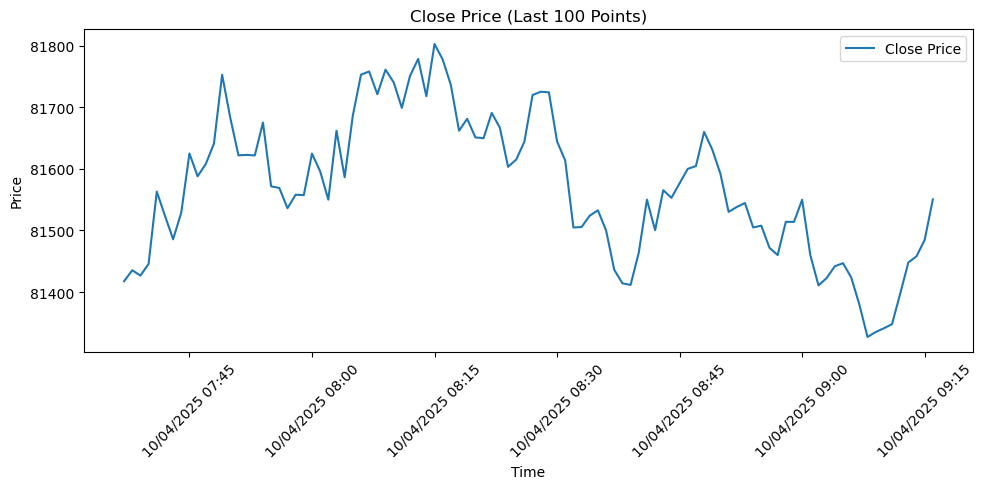

In [32]:
from matplotlib.dates import DateFormatter

# Convert your time column
global_df['start_time'] = pd.to_datetime(global_df['start_time'])

# Get last 100 rows
df_last = global_df.tail(100)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_last['start_time'], df_last['close'], label='Close Price')

# Set custom date format
date_fmt = DateFormatter('%d/%m/%Y %H:%M')  # Example: 10/04/2025 07:45
ax.xaxis.set_major_formatter(date_fmt)

# Labeling
ax.set_title('Close Price (Last 100 Points)')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Uptrend: Initial steady rise in price from around 07:45 to ~08:15.

 Volatility: Sharp ups and downs between 08:15 and 08:30.

 Downtrend: Significant drop observed from ~08:30 to ~09:00.

 Mild Recovery: Slight upward movement toward the end of the period.